In [13]:
from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
iris = datasets.load_iris()   #Se carga el dataset precargado en datasets

In [15]:
X_iris = iris.data      #Se carga la informacion en dos variables con arrays de la info 
Y_iris = iris.target
Y_iris

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
x = pd.DataFrame(X_iris, columns = ['Sepal Lenght', 'Sepal Width', 'Petal Length', 'Petal Width'])  #Se convierte en DF
y = pd.DataFrame(Y_iris, columns = ['Target'])
x.head()

,Sepal Lenght,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Text(0, 0.5, 'Petal Width')

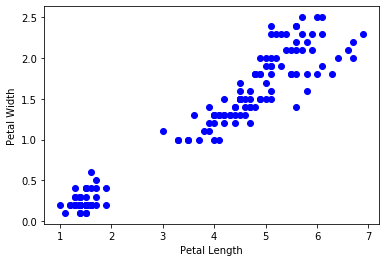

In [5]:
plt.scatter(x['Petal Length'], x['Petal Width'], c = 'blue')
plt.xlabel('Petal Length', fontsize = 10)
plt.ylabel('Petal Width', fontsize = 10)

In [12]:
model = KMeans(n_clusters = 3, max_iter = 1000)   #n_clusters es el valor de k nos permite generar los centroides
# Cuando el accuracy sale muy bajo modificamos el num de centroides en cluster 
model.fit(x)   #Son nuestros puntos
y_labels = model.labels_     #Se mandan llamar a las etiquetas que encontro en base a la similitud

In [7]:
y_kmeans = model.predict(x)    #como tienes la info 
print('Predicciones ', y_kmeans)   #Imprime los dos grupos de puntos    

Predicciones  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [19]:
from sklearn import metrics          #Se busca la presicion si no para dividir mas los clusters 

accuracy = metrics.adjusted_rand_score(Y_iris, y_kmeans)
print(accuracy)

0.7302382722834697


Text(0, 0.5, 'Petal Width')

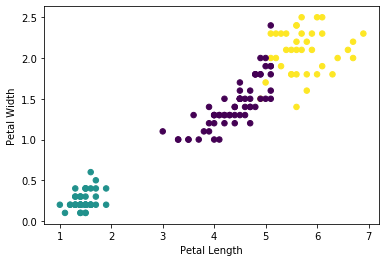

In [20]:
plt.scatter(x['Petal Length'], x['Petal Width'], c= y_kmeans, s = 30)
plt.xlabel('Petal Length', fontsize = 10)
plt.ylabel('Petal Width', fontsize = 10)

numero de n_clusters: 1 accurracy 0.0
numero de n_clusters: 2 accurracy 0.5399218294207123
numero de n_clusters: 3 accurracy 0.7302382722834697
numero de n_clusters: 4 accurracy 0.6498176853819967
numero de n_clusters: 5 accurracy 0.6154838709677419
numero de n_clusters: 6 accurracy 0.44753353143335994
numero de n_clusters: 7 accurracy 0.4820284449181035
numero de n_clusters: 8 accurracy 0.4495903964961916
numero de n_clusters: 9 accurracy 0.4288102029030271
numero de n_clusters: 10 accurracy 0.38715463430910585


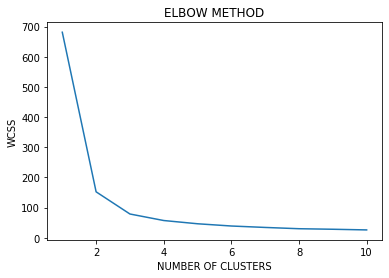

In [28]:
wcss = []      #Buscampos el centroide mas cercano a 100 para el cluster que sería 3, con la grafica del codo 
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, max_iter=1000, random_state=0)
    kmeans.fit(x)
    y_kmeans = kmeans.predict(x)
    wcss.append(kmeans.inertia_)
    accuracy =  metrics.adjusted_rand_score(Y_iris, y_kmeans)
    print(f'numero de n_clusters: {i} accurracy {accuracy}')
#Graficar 
plt.plot(range(1, 11), wcss)
plt.title('ELBOW METHOD')
plt.xlabel('NUMBER OF CLUSTERS')
plt.ylabel('WCSS')
plt.show()

predicciones  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
0.7302382722834697


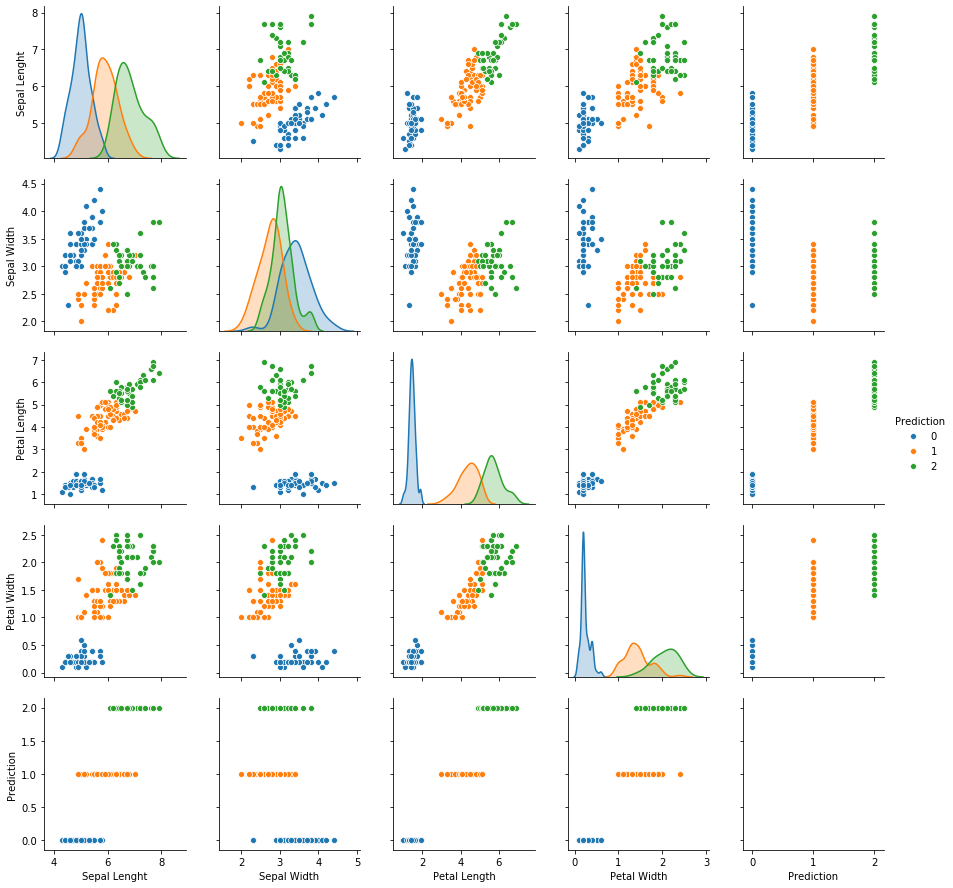

In [26]:
import seaborn as sns
# Aplico el modelo de KMeans
model = KMeans(n_clusters = 3, max_iter = 1000)
model.fit(x)
y_labels = model.labels_
y_kmeans = model.predict(x)
print('predicciones ', y_kmeans)
y_kmeans_df = pd.DataFrame(y_kmeans, columns = ['Prediction'])      #Se convierte la prediccion en dataframe para poder concatenarlo

# Precisión del modelo
accuracy =  metrics.adjusted_rand_score(Y_iris, y_kmeans)
print(accuracy)

# Concateno el dataset de entrada con el de la prediccion
Z = pd.concat([x, y_kmeans_df],axis=1)

# Grafico para ver relación de las features con respecto a las 
# valores de la predicción, poniendo color según (0,1,2) 
# considerando las tres clases.
sns.pairplot(Z, hue = 'Prediction')